In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Data-Science-With-Machine-Learning-And-NLP-2024/refs/heads/main/3-Complete%20Linear%20Regression/Practicals/height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

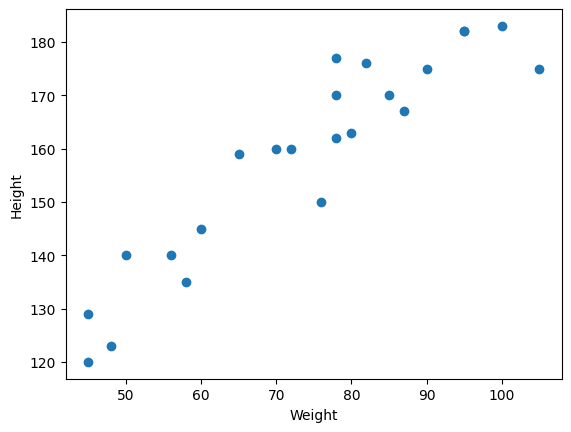

In [8]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [9]:
import seaborn as sns
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


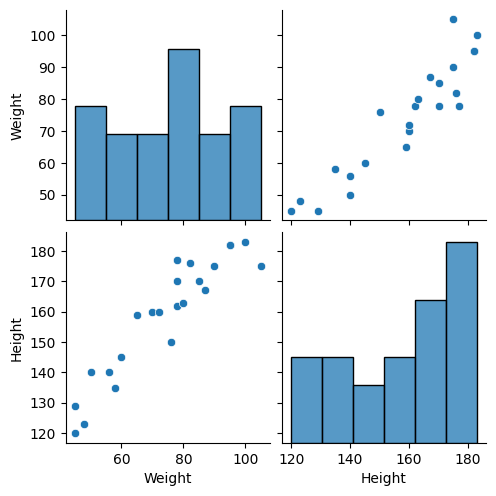

In [10]:
sns.pairplot(df)

In [76]:
#dependent and independent feature

X_series = df['Weight'] #this should be always in dataframe or 2D array
print(type(X_series)) #here it is series we shoudl always have info about row and col both here the shape is only of col
X_series.shape

<class 'pandas.core.series.Series'>


(23,)

In [20]:
X = df[['Weight']]
type(X)

pandas.core.frame.DataFrame

In [21]:
X.shape

(23, 1)

In [23]:
y=df['Height'] #it can be series because the dependent feature will only have one value
y.shape

(23,)

In [93]:
#train and test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=4332)

In [94]:
X_train.shape

(17, 1)

In [95]:
y_train.shape

(17,)

In [96]:
#now we perform standardization
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #due to data leakage 

In [97]:
X_test

array([[ 0.01032044],
       [-1.15932896],
       [-0.45753932],
       [-1.91960107],
       [-0.1066445 ],
       [-1.74415366]])

In [98]:
#apply linear regression

from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)



In [99]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [100]:
regression.coef_ #this is the w1 or ß1 in ß0+ß1x1=0 it is ß1

array([14.99721222])

In [101]:
regression.intercept_ #this will give me the intercept of the best fit line

np.float64(163.8235294117647)

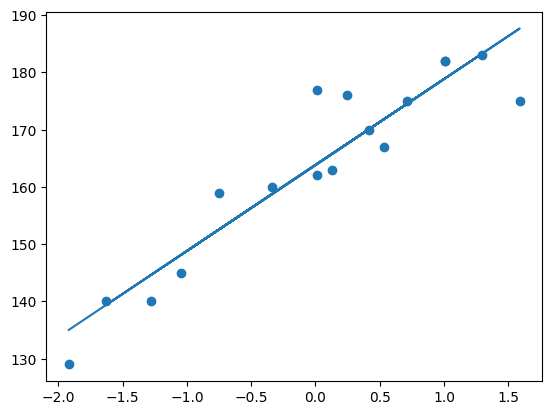

In [102]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [103]:
# prediction of test data
# predicted height output= intercept +coef_(Weights)
# y_pred_test =156.470 + 17.29(X_test)

In [104]:
#prediction for test data

y_pred=regression.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [106]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
score= r2_score(y_test,y_pred)
print(mse,mae,rmse,score)

127.81071584415265 10.403652551934163 11.305340147211522 0.627735779094701


In [107]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5346697238683763

In [108]:
regression.predict(scaler.transform([[72]]))

d:\berlin\udemy\projects\lambda\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.7158631])